In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf  
import matplotlib.pyplot as plt
import cv2

print(tf.__version__)

print("imported everything")

2.4.0
imported everything


In [2]:
import os 

path, dirs, files= next(os.walk(r"C:\Users\Acer\Desktop\lampix glass dettect\TDB_M"))
files.sort()
print("done")


done


Imported the scanned images.
1999


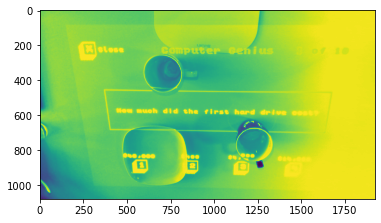

In [49]:
import glob
data_images = []
for image in glob.glob(r"C:\Users\Acer\Desktop\lampix glass dettect\TDB_M\*.jpg"):
  imagess = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
  data_images.append(imagess)

print("Imported the scanned images.")
print(len(data_images))
plt.imshow(data_images[78])
# print(training_images[66])
# plt.imshow(plt.imread(r"C:\Users\Acer\Desktop\lampix glass dettect\TDB_M\00086.jpg"))


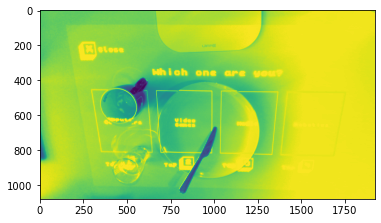

In [40]:
plt.imshow(data_images[67])

In [5]:
import json
import ntpath
from pathlib import Path
import glob

def aggregate_jsons(save_file = False):
    res = {}
    classes = {}
    the_big_jason_labels=[]
    regionss = []
    fill = {}
    no_class = 0
    for jsn in glob.glob(r"C:\Users\Acer\Desktop\lampix glass dettect\TDB_M\*.json"):
        file_json = open(jsn)
        json_read = file_json.read()
        jsonss = json.loads(json_read)
        deletes = []
        
        for j in jsonss:
            if len(jsonss[j]["regions"]) == 0:
                deletes.append(j)
            else:
                for r in jsonss[j]["regions"]:
                    
                    if "Type" in jsonss[j]["regions"][r]["region_attributes"]:
                        c = jsonss[j]["regions"][r]["region_attributes"]["Type"].lower().strip()
                        the_big_jason_labels.append(c)
                        if c in classes:
                            classes[c] += 1
                        else:
                            classes[c] = 1
                    elif "type" in jsonss[j]["regions"][r]["region_attributes"]:
                        c = jsonss[j]["regions"][r]["region_attributes"]["type"]
                        if c in classes:
                            classes[c] += 1
                        else:
                            classes[c] = 1                            
                    else:
                        no_class += 1

        #print(len(deletes))
        for j in deletes:
            del jsonss[j]
            
        res.update(jsonss)
        #if s.find("00084.jpg") > 0:
        #    # print(ntpath.basename(fn), " for ", s)
        #    sz = Path("/home/mihai/src/data/TDB_M-20201114T103840Z-001/TDB_M/00084.jpg").stat().st_size
        #    print(res["00084.jpg" + str(sz)])
        #    print("00084.jpg" + str(sz))
        #    break
        file_json.close()

    print("region classes:", classes)
    print("no class for", no_class, "regions")
    print(the_big_jason_labels)
#     print(len(the_big_jason_labels))
#     print(test)
    
    if save_file:
        f = open("bigjson.json", "w")
        f.write(json.dumps(res))
        f.close()
    return res, classes, deletes


In [6]:
aggregate_jsons()

region classes: {'glass': 4987, 'plate': 310, 'cup': 1115}
no class for 15 regions
['glass', 'plate', 'glass', 'glass', 'plate', 'plate', 'glass', 'plate', 'plate', 'plate', 'glass', 'plate', 'plate', 'cup', 'glass', 'glass', 'plate', 'plate', 'glass', 'cup', 'plate', 'cup', 'glass', 'glass', 'glass', 'cup', 'cup', 'plate', 'plate', 'plate', 'cup', 'plate', 'cup', 'glass', 'plate', 'cup', 'glass', 'plate', 'glass', 'plate', 'glass', 'glass', 'plate', 'plate', 'glass', 'glass', 'plate', 'cup', 'plate', 'plate', 'cup', 'glass', 'plate', 'cup', 'glass', 'glass', 'plate', 'glass', 'glass', 'glass', 'cup', 'cup', 'cup', 'cup', 'plate', 'cup', 'cup', 'glass', 'cup', 'plate', 'plate', 'cup', 'cup', 'plate', 'plate', 'plate', 'glass', 'plate', 'plate', 'glass', 'cup', 'plate', 'plate', 'glass', 'plate', 'plate', 'cup', 'plate', 'plate', 'plate', 'plate', 'plate', 'glass', 'plate', 'cup', 'plate', 'glass', 'plate', 'plate', 'cup', 'glass', 'plate', 'plate', 'plate', 'plate', 'glass', 'plate', '

({'00051.jpg304481': {'fileref': '',
   'size': 304481,
   'filename': '00051.jpg',
   'base64_img_data': '',
   'file_attributes': {},
   'regions': {'0': {'shape_attributes': {'name': 'rect',
      'x': 478,
      'y': 644,
      'width': 262,
      'height': 290},
     'region_attributes': {'Type': 'glass', 'Fill': '0'}},
    '1': {'shape_attributes': {'name': 'rect',
      'x': 1062,
      'y': 429,
      'width': 637,
      'height': 587},
     'region_attributes': {'Type': 'plate', 'Fill': '0'}}}},
  '00052.jpg310114': {'fileref': '',
   'size': 310114,
   'filename': '00052.jpg',
   'base64_img_data': '',
   'file_attributes': {},
   'regions': {'0': {'shape_attributes': {'name': 'rect',
      'x': 609,
      'y': 423,
      'width': 238,
      'height': 223},
     'region_attributes': {'Type': 'glass', 'Fill': '0'}},
    '1': {'shape_attributes': {'name': 'rect',
      'x': 786,
      'y': 629,
      'width': 250,
      'height': 390},
     'region_attributes': {'Type': 'glass'

In [ ]:
import json
import ntpath
from pathlib import Path

def aggregate_jsonss(save_file = False):
    res = {}
    classes = {}
    the_big_jason_labels=[]
    regionss = []
    fill = {}
    no_class = 0
    for jsn in glob.glob(r"C:\Users\Acer\Desktop\lampix glass dettect\TDB_M\*.json"):
        file_json = open(jsn)
        json_read = file_json.read()
        jsonss = json.loads(json_read)
        deletes = []
        for j in jsonss:
            if len(jsonss[j]["regions"]) == 0:
                deletes.append(j)
            else:
                for r in jsonss[j]["regions"]:
                    regionss.append(jsonss[j]["regions"])
            the_big_jason_labels.append(regionss) 
    print("done")
    print(the_big_jason_labels)
        
        file_json.close()




#     if save_file:
#         f = open("bigjson.json", "w")
#         f.write(json.dumps(res))
#         f.close()
#     return res, classes, deletes


In [ ]:
aggregate_jsonss()


In [113]:
print("hello")

In [ ]:
def load_data():
    train_images_np = []
    num = 0
    num_empty = 0
    data, classes = aggregate_jsons()
    
    label_id_offset = 1
    train_image_tensors = []
    gt_classes_one_hot_tensors = []
    gt_box_tensors = []
    category_by_name = {}
    
    n = 1
    for c in classes:
        category_index[n] = {'id': n, 'name': c}
        category_by_name[c] = n
        n += 1
    
    num_classes = len(classes)
       
    for fn in glob.glob("/home/mihai/src/data/TDB_M-20201114T103840Z-001/TDB_M/*.jpg"):
        sz = Path(fn).stat().st_size
        # load the image
        bname = ntpath.basename(fn)
        k = bname + str(sz)
        if k in data:
            if len(data[k]['regions']) == 0:
                print(bname, ": 0")
            else:
                img = asarray(Image.open(fn))
                res_y = img.shape[0]
                res_x = img.shape[1]
                boxes = []
                classes = []
                scores = []
                for r in data[k]['regions']:
                    ra = data[k]['regions'][r]["region_attributes"]
                    if "type" in ra:
                        cls = ra["type"].lower().strip()
                    elif "Type" in ra:
                        cls = ra["Type"].lower().strip()
                    else:
                        continue
                    
                    rg = data[k]['regions'][r]['shape_attributes']
                    npr = [rg['y']/res_y, rg['x']/res_x, (rg['y'] + rg['height'])/res_y, (rg['x'] + rg['width'])/res_x]
                    boxes.append(npr)
                    classes.append(category_by_name[cls])
                    scores.append(1.0)
                    break
                    
                if(len(boxes) >= 1):
                    #print("classes are ", classes, "and we have", len(boxes), "boxes")
                    train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(img, dtype=tf.float32), axis=0))
                    gt_box_tensors.append(tf.convert_to_tensor(boxes, dtype=tf.float32))
                    zero_indexed_groundtruth_classes = tf.convert_to_tensor(
                       np.array(classes, dtype=np.int32) - label_id_offset)
                    gt_classes_one_hot_tensors.append(tf.one_hot(zero_indexed_groundtruth_classes, num_classes))
                else:
                    print("BAMMMM")
                
                #ori_image = np.ones([360, 480, 3], dtype=np.int32) * 200
                #test_image = img.copy()
                #boxes = np.array(boxes, dtype=np.float32)
                #classes = np.array(classes, dtype=np.int32)
                #detections = np.ones(len(classes))
                #i = viz_utils.visualize_boxes_and_labels_on_image_array(
                #  test_image, boxes, classes, detections,
                #  category_index,
                #  use_normalized_coordinates=True,
                #  min_score_thresh=0.3)
                #cv2.imwrite("img.jpg", i)
        else:
            print("no region data for ", k)
            num_empty += 1

        num += 1
        
        if num > 300: break
            
            
    print("empty ", num_empty)
    return train_image_tensors, gt_classes_one_hot_tensors, gt_box_tensors


def show_some_data():
    dummy_scores = np.array([1.0], dtype=np.float32)  # give boxes a score of 100%

    plt.figure(figsize=(30, 15))
    for idx in range(5):
      plt.subplot(2, 3, idx+1)
      plot_detections(
          train_images_np[idx],
          gt_boxes[idx],
          np.ones(shape=[gt_boxes[idx].shape[0]], dtype=np.int32),
          dummy_scores, category_index)
    plt.show()

train_image_tensors, gt_classes_one_hot_tensors, gt_box_tensors = load_data()
print("loaded ", len(train_image_tensors))

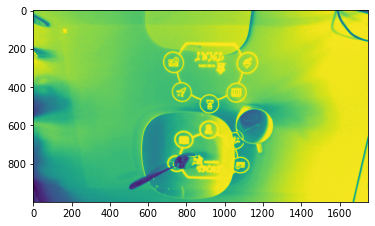

In [47]:
from PIL import Image
from numpy import asarray

# reshaping the images so its easier to process them 

def modify_images():
    mod_data_images = [] 
    global data_images
    for pic in data_images:
        img = cv2.resize(pic, (1750,1000))
        img_reshaped = cv2.
        
    X_train, X_test = mod_data_images[:1500], mod_data_images[1500:1999]
    y_train, y_test = y[:60000], y[60000:70000]
#     print(training_images [12])
#     plt.imshow(training_images[12])
#     img = cv2.resize(img, (28,28))
    plt.imshow(img)

load_images()
    
